In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return x**3-2*x+1

def df(x):
    return 3*x**2-2

def ddf(x):
    return 6*x

#### 1. 최적화 알고리즘 Ⅰ

In [3]:
class firstDeriv:
    def __init__(self, df, lamb):
        self.df = df
        self.lamb = lamb
        
    def __next(self, x):
        return x - self.lamb*df(x)
    
    def optim(self, x, n=None, eps=1e-6):
        res = []
        res.append(x)
        if n != None:
            for i in range(n):
                x = self.__next(x)
                res.append(x)
        elif eps != None:
            while True:
                x0 = x
                x = self.__next(x)
                res.append(x)
                if abs(x-x0) < eps:
                    break
        return np.asarray(res)

In [4]:
fd = firstDeriv(df, 0.03)
z = fd.optim(4, eps=1e-6)
z

array([4.        , 2.62      , 2.062204  , 1.73946232, 1.5271467 ,
       1.37725076, 1.26653699, 1.18216656, 1.11638996, 1.06422057,
       1.02228968, 0.98823282, 0.96033845, 0.93733596, 0.91826208,
       0.9023736 , 0.88908857, 0.87794551, 0.86857456, 0.8606766 ,
       0.85400782, 0.84836818, 0.84359261, 0.83954424, 0.83610914,
       0.83319207, 0.83071326, 0.82860565, 0.82681279, 0.82528705,
       0.82398816, 0.82288208, 0.82193994, 0.82113726, 0.82045329,
       0.81987036, 0.8193735 , 0.81894993, 0.81858882, 0.81828093,
       0.8180184 , 0.81779453, 0.81760362, 0.81744081, 0.81730196,
       0.81718353, 0.81708253, 0.81699638, 0.8169229 , 0.81686023,
       0.81680677, 0.81676118, 0.81672228, 0.81668911, 0.81666081,
       0.81663667, 0.81661608, 0.81659852, 0.81658353, 0.81657075,
       0.81655985, 0.81655055, 0.81654262, 0.81653585, 0.81653008,
       0.81652516, 0.81652096, 0.81651738, 0.81651432, 0.81651171,
       0.81650949, 0.81650759, 0.81650597, 0.81650459, 0.81650

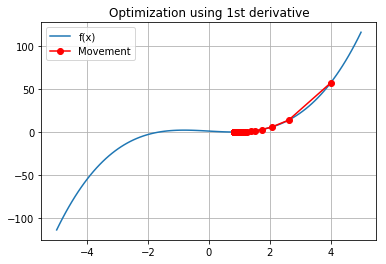

In [5]:
x = np.linspace(-5,5,100)
plt.plot(x, f(x), label='f(x)')
plt.plot(z, f(z), '-o', c='red', label='Movement')
plt.grid(True)
plt.legend()
plt.title('Optimization using 1st derivative')
plt.show()

#### 2. 최적화 알고리즘 Ⅱ

In [6]:
class secondDeriv:
    def __init__(self, df, ddf):
        self.df = df
        self.ddf = ddf
        
    def __next(self, x):
        return x - self.df(x)/self.ddf(x)
    
    def optim(self, x, n=None, eps=1e-6):
        res = []
        res.append(x)
        if n != None:
            for i in range(n):
                x = self.__next(x)
                res.append(x)
        elif eps != None:
            while True:
                x0 = x
                x = self.__next(x)
                res.append(x)
                if abs(x-x0) < eps:
                    break
        return np.asarray(res)

In [7]:
sd = secondDeriv(df, ddf)
z = sd.optim(4, eps=1e-6)
z

array([4.        , 2.08333333, 1.20166667, 0.87822584, 0.81866601,
       0.81649946, 0.81649658, 0.81649658])

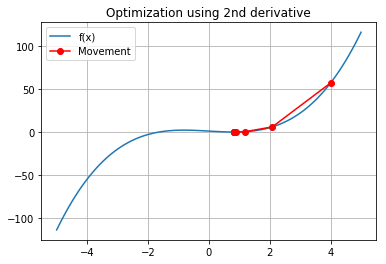

In [8]:
x = np.linspace(-5,5,100)
plt.plot(x, f(x), label='f(x)')
plt.plot(z, f(z), '-o', c='red', label='Movement')
plt.grid(True)
plt.legend()
plt.title('Optimization using 2nd derivative')
plt.show()

#### 3. Golden Section Search

In [10]:
class gss:
    def __init__(self, f, tol=1e-5):
        self.f = f
        self.tol = tol
        self.__phi = (1+5**0.5)/2
    
    def __next(self, p):
        a, b, c, d = p
        if self.f(c) < self.f(d): b = d
        else: a = c
        return (a, b)
    
    def optim(self, a, b):
        res = []
        res.append((a,b))
        while True:
            c = b-(b-a)/self.__phi
            d = a+(b-a)/self.__phi
            if abs(c-d) < self.tol:
                break
            a, b = self.__next((a,b,c,d))
            res.append((a,b))
            
        return np.asarray(res)

In [11]:
gss = gss(f)
z = gss.optim(-4,4)
z

array([[-4.        ,  4.        ],
       [-0.94427191,  4.        ],
       [-0.94427191,  2.11145618],
       [ 0.22291236,  2.11145618],
       [ 0.22291236,  1.39009663],
       [ 0.66873708,  1.39009663],
       [ 0.66873708,  1.1145618 ],
       [ 0.66873708,  0.94427191],
       [ 0.77398202,  0.94427191],
       [ 0.77398202,  0.87922696],
       [ 0.77398202,  0.83902697],
       [ 0.79882698,  0.83902697],
       [ 0.79882698,  0.82367194],
       [ 0.80831691,  0.82367194],
       [ 0.81418201,  0.82367194],
       [ 0.81418201,  0.82004711],
       [ 0.81418201,  0.81780684],
       [ 0.81556657,  0.81780684],
       [ 0.81556657,  0.81695113],
       [ 0.81609543,  0.81695113],
       [ 0.81609543,  0.81662428],
       [ 0.81629743,  0.81662428],
       [ 0.81642228,  0.81662428],
       [ 0.81642228,  0.81654712],
       [ 0.81646997,  0.81654712],
       [ 0.81646997,  0.81651765],
       [ 0.81648818,  0.81651765]])

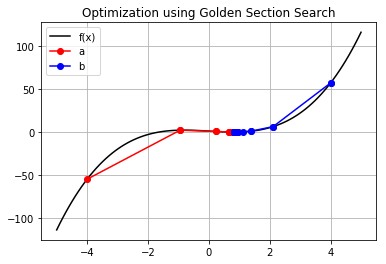

In [15]:
x = np.linspace(-5,5,100)
plt.plot(x, f(x), c='black', label='f(x)')
plt.plot(z[:,0], f(z[:,0]), '-o', c='red', label='a')
plt.plot(z[:,1], f(z[:,1]), '-o', c='blue', label='b')
plt.grid(True)
plt.legend()
plt.title('Optimization using Golden Section Search')
plt.show()